# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer

# Load Data

In [2]:
df = pd.read_csv(r"E:\Downloads\archive (13)\Clean_Dataset.csv")

# Data Preprocessing, Visualization, Exploration

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='price'>

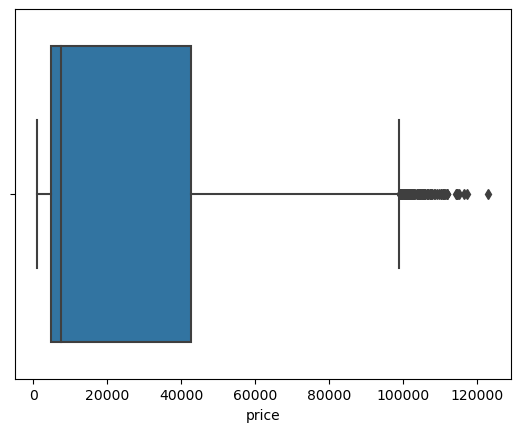

In [7]:
sns.boxplot(x='price',data=df)

In [8]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

<Axes: xlabel='price'>

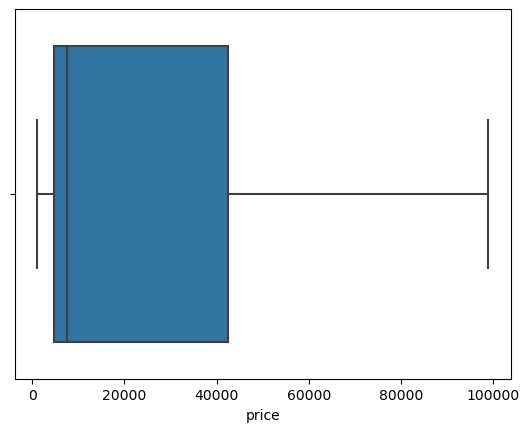

In [9]:
sns.boxplot(x='price',data=df)

<Axes: xlabel='days_left'>

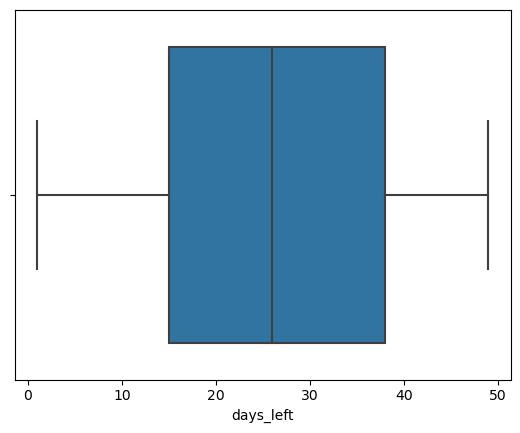

In [10]:
sns.boxplot(x='days_left',data=df)

<Axes: xlabel='duration'>

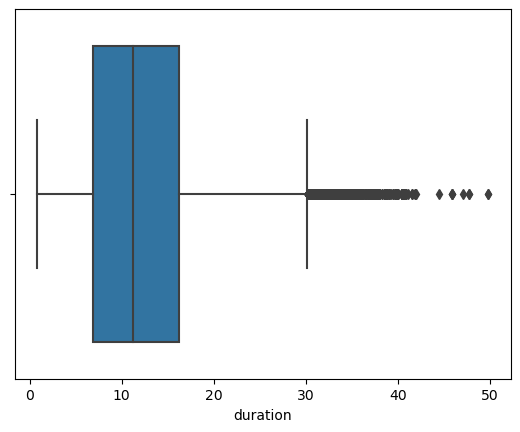

In [11]:
sns.boxplot(x='duration',data=df)

In [12]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["duration"] < lower_bound) | (df["duration"] > upper_bound)]
df = df[(df["duration"] >= lower_bound) & (df["duration"] <= upper_bound)]

<Axes: xlabel='duration'>

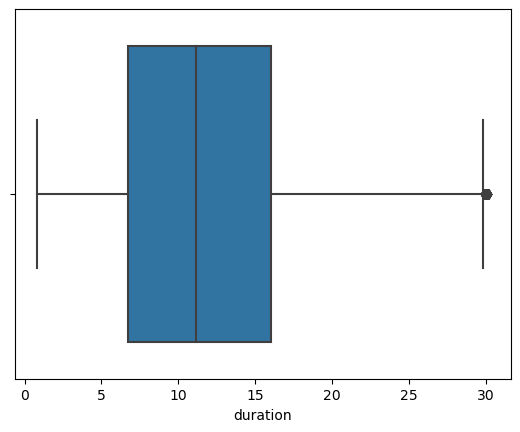

In [13]:
sns.boxplot(x='duration',data=df)

In [14]:
df = df.drop(columns=['Unnamed: 0'])
df['Price_ln']=df['price'].apply(np.log)
df=df.drop('price',axis=1)

In [15]:
df.describe()

,duration,days_left,Price_ln
count,297920.000000,297920.000000,297920.000000
mean,12.071699,26.039370,9.328822
std,6.994057,13.549647,1.114562
min,0.830000,1.000000,7.007601
25%,6.750000,15.000000,8.467372
50%,11.170000,26.000000,8.912473
75%,16.000000,38.000000,10.657753
max,30.170000,49.000000,11.502592


categories of (airline) --- 
 Vistara      126917
Air_India     79601
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
********************************************************************************


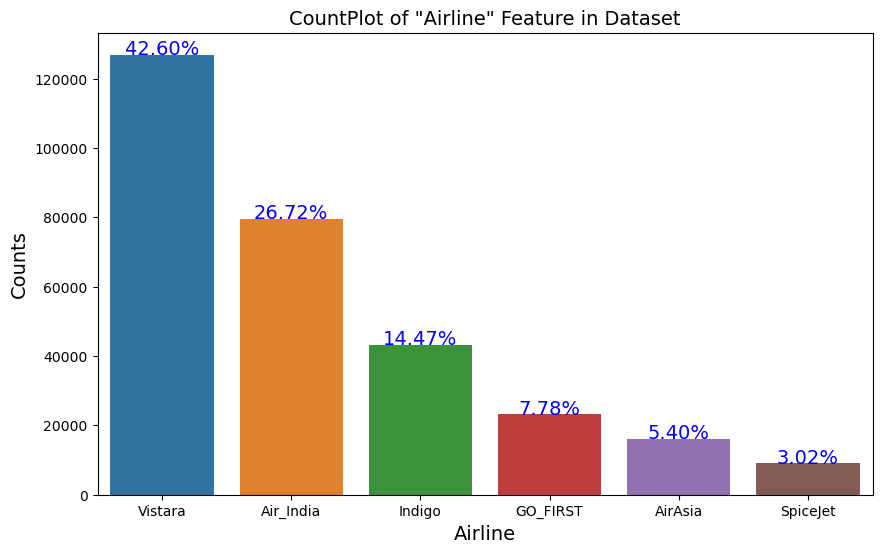

In [16]:
### Check the Distribution of (Airline) Feature in Dataset
airline_val = df['airline'].value_counts()
print('categories of (airline) --- \n', airline_val)
print('**'*40)


## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=df, order=airline_val.index)
plt.title('CountPlot of "Airline" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Airline', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(airline_val)):  ## loop over the numbers of categories (number of bars)
    each_count = airline_val.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

<Axes: xlabel='class', ylabel='count'>

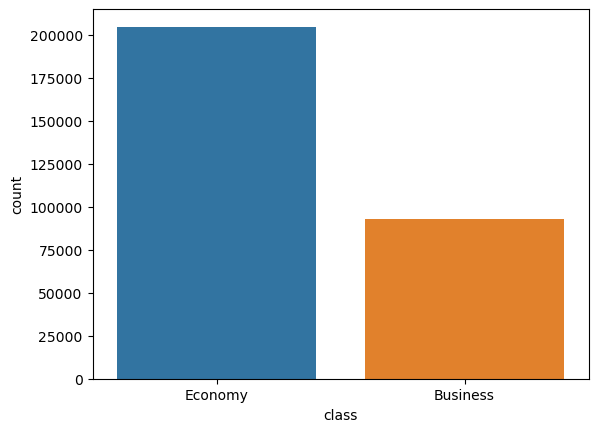

In [17]:
sns.countplot(x='class',data=df)

<Axes: xlabel='arrival_time', ylabel='count'>

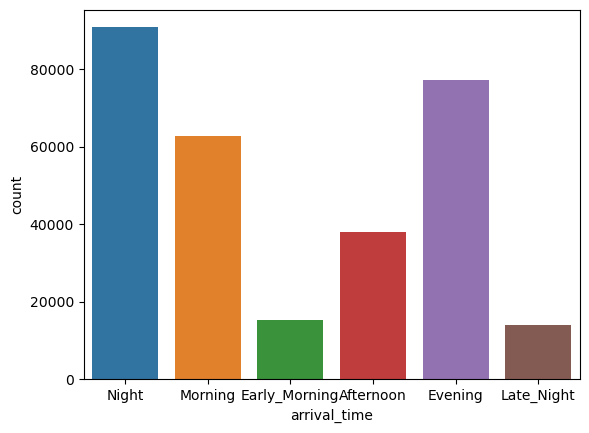

In [18]:
sns.countplot(x='arrival_time',data=df)

<Axes: xlabel='departure_time', ylabel='count'>

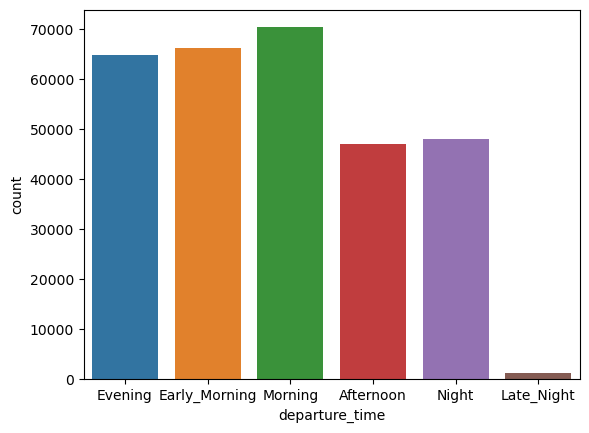

In [19]:
sns.countplot(x='departure_time',data=df)

In [20]:
class_values = df['class'].value_counts()
print('categories of (class) --- \n', class_values)

categories of (class) --- 
 Economy     204792
Business     93128
Name: class, dtype: int64


In [21]:
arrival_time = df['arrival_time'].value_counts()
print('categories of (arrival_time) --- \n', arrival_time)

categories of (arrival_time) --- 
 Night            90702
Evening          77217
Morning          62708
Afternoon        37938
Early_Morning    15367
Late_Night       13988
Name: arrival_time, dtype: int64


In [22]:
departure_time = df['departure_time'].value_counts()
print('categories of (departure_time) --- \n', departure_time)

categories of (departure_time) --- 
 Morning          70372
Early_Morning    66189
Evening          64955
Night            47998
Afternoon        47100
Late_Night        1306
Name: departure_time, dtype: int64


In [23]:
class_mapping = {'Economy': 0, 'Business': 1}
df['class'] = df['class'].map(class_mapping)

In [24]:
arrivalTime_mapping = {'Night': 0, 'Evening': 1,'Morning':2, 'Afternoon':3,'Early_Morning':4,'Late_Night':5}
df['arrival_time'] = df['arrival_time'].map(arrivalTime_mapping)

In [25]:
stops_mapping = {'zero': 0, 'one': 1,'two_or_more':2}
df['stops'] = df['stops'].map(stops_mapping)

In [26]:
departure_time_mapping = {'Morning': 0, 'Early_Morning': 1, 'Evening': 2, 'Night': 3, 'Afternoon': 4, 'Late_Night': 5}
df['departure_time'] = df['departure_time'].map(departure_time_mapping)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297920 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297920 non-null  object 
 1   flight            297920 non-null  object 
 2   source_city       297920 non-null  object 
 3   departure_time    297920 non-null  int64  
 4   stops             297920 non-null  int64  
 5   arrival_time      297920 non-null  int64  
 6   destination_city  297920 non-null  object 
 7   class             297920 non-null  int64  
 8   duration          297920 non-null  float64
 9   days_left         297920 non-null  int64  
 10  Price_ln          297920 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 27.3+ MB


In [28]:
airline = df['airline'].value_counts()
print('categories of (airline) --- \n', airline)

categories of (airline) --- 
 Vistara      126917
Air_India     79601
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


In [29]:
df.corr(numeric_only=True)

,departure_time,stops,arrival_time,class,duration,days_left,Price_ln
departure_time,1.000000,-0.036378,0.051572,-0.014664,0.038457,0.004951,-0.040829
stops,-0.036378,1.000000,-0.054357,0.004717,0.462866,-0.004915,0.171638
arrival_time,0.051572,-0.054357,1.000000,-0.073503,-0.015034,0.024548,-0.120066
class,-0.014664,0.004717,-0.073503,1.000000,0.152830,-0.013598,0.909761
duration,0.038457,0.462866,-0.015034,0.152830,1.000000,-0.033880,0.270935
days_left,0.004951,-0.004915,0.024548,-0.013598,-0.033880,1.000000,-0.192407
Price_ln,-0.040829,0.171638,-0.120066,0.909761,0.270935,-0.192407,1.000000


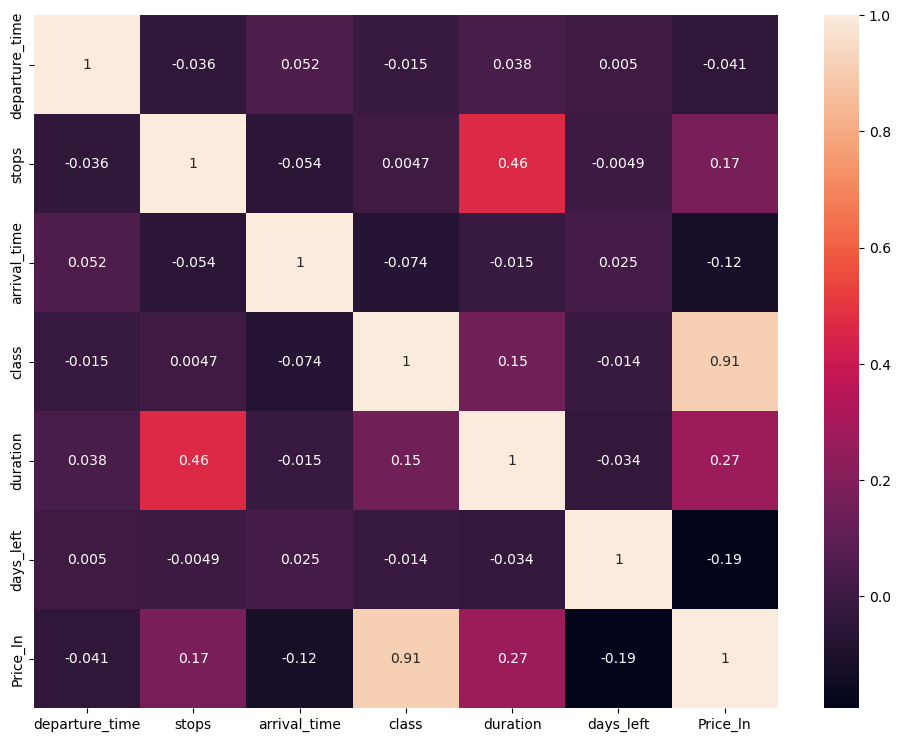

In [30]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [31]:
df.corr(numeric_only=True)['Price_ln'].sort_values(ascending=False)

Price_ln          1.000000
class             0.909761
duration          0.270935
stops             0.171638
departure_time   -0.040829
arrival_time     -0.120066
days_left        -0.192407
Name: Price_ln, dtype: float64

# Split Data into train and test

In [32]:
X = df.drop('Price_ln', axis=1)
y = df['Price_ln']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Pipeline

In [34]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]

In [35]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_cols)),  # Assuming you have DataFrameSelector to select columns
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [36]:
categ_pipeline = Pipeline([
    ('selector', DataFrameSelector(categ_cols)),  # Assuming you have DataFrameSelector to select columns
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=True))  # Set sparse_output to True explicitly
])

In [37]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipe', num_pipeline),
    ('categ_pipe', categ_pipeline)
])

In [38]:
X_train_final = full_pipeline.fit_transform(X_train)
X_test_final = full_pipeline.transform(X_test)

# Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lin_reg = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_lin_reg = LinearRegression(**best_params)
best_lin_reg.fit(X_train_final, y_train)
train_score = best_lin_reg.score(X_train_final, y_train) * 100
test_score = best_lin_reg.score(X_test_final, y_test) * 100
print(f'Best Parameters: {best_params}')
print(f'Training Score: {train_score:.2f}%')
print(f'Testing Score: {test_score:.2f}%')

Best Parameters: {'fit_intercept': False}
Training Score: 93.15%
Testing Score: 93.09%


In [40]:
y_pred = best_lin_reg.predict(X_test_final)

In [41]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.23006053018251554


In [42]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.08596489710374784


In [43]:
from sklearn.metrics import median_absolute_error
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Median Squared Error Value is :  0.1929421589320599


# KNN Model 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import median_absolute_error

param_grid = {
    'n_neighbors': [1, 3, 5]
}
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_final, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_
print(f'Best Number of Neighbors: {best_k}')
train_score = best_knn_model.score(X_train_final, y_train) * 100
test_score = best_knn_model.score(X_test_final, y_test) * 100
print(f'Training Score: {train_score:.2f}%')
print(f'Testing Score: {test_score:.2f}%')

Best Number of Neighbors: 3
Training Score: 99.13%
Testing Score: 98.12%


In [45]:
#Calculating Prediction
y_pred = best_knn_model.predict(X_test_final)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.07551846106574137


In [46]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.023348957671072385


In [47]:
from sklearn.metrics import median_absolute_error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Median Squared Error Value is :  0.01392821025312152


# Decision tree Model

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
      # Mean Squared Error or Mean Absolute Error
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

tree_reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree_reg, param_grid, cv=5)
grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_tree_reg = grid_search.best_estimator_
train_score = best_tree_reg.score(X_train_final, y_train) * 100
test_score = best_tree_reg.score(X_test_final, y_test) * 100
print(f'Training Score: {train_score:.2f}%')
print(f'Testing Score: {test_score:.2f}%')

Training Score: 99.52%
Testing Score: 98.49%


In [49]:
#Calculating Prediction
y_pred = best_tree_reg.predict(X_test_final)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.05275194166279172


In [50]:
print("Mean Squared Error Value is :  0.0198426552641022661")

Mean Squared Error Value is :  0.0198426552641022661


# Random forest Model

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]         
}
random_forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_random_forest_reg = grid_search.best_estimator_
train_score = best_random_forest_reg.score(X_train_final, y_train) * 100
test_score = best_random_forest_reg.score(X_test_final, y_test) * 100
print(f'Training Score: {train_score:.2f}%')
print(f'Testing Score: {test_score:.2f}%')

Trainig score: 99.02%
Testing score: 98.82%


In [52]:
#Calculating Prediction
y_pred = best_random_forest_reg.predict(X_test_final)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.06192241662297547


In [53]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.0212671937241642245


# Ridge Model

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strength
}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_
best_ridge_model.fit(X_train_final, y_train)
train_score = best_ridge_model.score(X_train_final, y_train) * 100
print(f'Training Score: {train_score:.2f}%')
test_score = best_ridge_model.score(X_test_final, y_test) * 100
print(f'Testing Score: {test_score:.2f}%')

Training Score: 93.26%
Testing Score: 92.67%


In [55]:
#Calculating Prediction
y_pred = best_ridge_model.predict(X_test_final)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.29546053057251819


In [56]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.0914638797249724346
